In [6]:
!pip install rdkit

In [7]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs

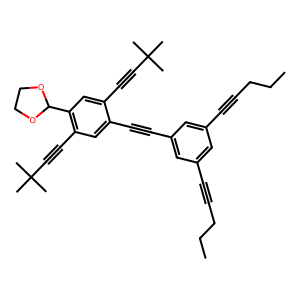

In [8]:
# You can convert a SMILES string to an rdkit molecule object and draw it in the
# notebook for easy viewing.

mol = Chem.MolFromSmiles("O1CCOC1c1c(C#CC(C)(C)C)cc(c(C#CC(C)(C)C)c1)C#Cc1cc(C#CCCC)cc(C#CCCC)c1")
Draw.MolToImage(mol)

In [9]:
# Let's download a diversity set containing many smiles strings
# Source: https://www.chemdiv.com/catalog/diversity-libraries/ (soluble diversity library)

!curl -O https://raw.githubusercontent.com/durrantlab/colab-support-files/main/SDF_Soluble_Diversity_Library_15500.smi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1742k  100 1742k    0     0  5189k      0 --:--:-- --:--:-- --:--:-- 5186k


In [10]:
# What does this file look like?
with open("SDF_Soluble_Diversity_Library_15500.smi") as f:
  for i in range(5):
    print(f.readline().strip())

Brc1ccc2c(c1)cc([nH]2)C(=O)N	5-bromo-1H-indole-2-carboxamide
O=C(C(N1CCN(CC1)c1ccccc1F)C)NC1CCCCC1	N-cyclohexyl-2-[4-(2-fluorophenyl)piperazin-1-yl]propanamide
O=C(C(C)(C)C)NCc1ccc(cc1)Cl	N-[(4-chlorophenyl)methyl]-2,2-dimethylpropanamide
O=C(c1c2CCCc2nc2c1cccc2)NC1CC1	N-cyclopropyl-1H,2H,3H-cyclopenta[b]quinoline-9-carboxamide
O=C(C(C)C)Nc1ccc(c(c1)C)Br	N-(4-bromo-3-methylphenyl)-2-methylpropanamide


In [11]:
# The smiles string is the first column. Let's load them all into a big list.
all_smiles = []
with open("SDF_Soluble_Diversity_Library_15500.smi") as f:
  for line in f:
    all_smiles.append(line.split()[0])

all_smiles[:15]

['Brc1ccc2c(c1)cc([nH]2)C(=O)N',
 'O=C(C(N1CCN(CC1)c1ccccc1F)C)NC1CCCCC1',
 'O=C(C(C)(C)C)NCc1ccc(cc1)Cl',
 'O=C(c1c2CCCc2nc2c1cccc2)NC1CC1',
 'O=C(C(C)C)Nc1ccc(c(c1)C)Br',
 'O=C1NC2(CCCCCC2)Oc2c1cccc2',
 'O=C(Nc1ccc(cc1)F)CC(C)(C)C',
 'COC(=O)C1CN(C(=O)C1)c1ccc(cc1)Br',
 'Fc1cccc(c1)n1nnc(c1)C(=O)NC1CC1',
 'O=C(C(C)C)Nc1ccc(cc1C)Br',
 'Brc1cccc(c1)C(=O)N(C1CCCCC1)CCC(=O)N1CCNCC1',
 'Cc1nc2c(s1)cc(cc2)C(=O)N1CCC2(C(C1)CCCC2)O',
 'CCCCCN(C(=O)c1ccc(c(c1)Cl)F)CCC(=O)N1CCNCC1',
 'OC(=O)Cn1nc(C)c2c(c1=O)cccc2',
 'CN1C(CC(=O)C(C1c1ccccc1)C)c1ccccc1']

In [12]:
# Colab has limted memory, so let's keep only the first 2000 of these molecules.
# all_smiles = all_smiles[:2000]

In [13]:
# Let's now convert all these smiles strings into rdkit molecule objects.
all_mols = [Chem.MolFromSmiles(s) for s in all_smiles]

all_mols[:15]

In [14]:
# You compute tanimoto similarity between fingerprints, not molecules. So we
# should convert all these molecules into fingerprints.

all_fps = [rdMolDescriptors.GetMorganFingerprint(m, radius=2) for m in all_mols]

all_fps[:15]

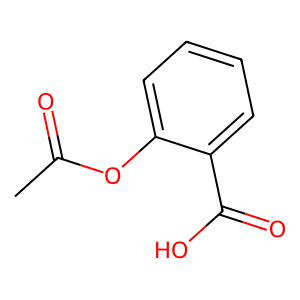

In [15]:
# Let's consider aspirin:

aspirin_mol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(=O)O")
Draw.MolToImage(aspirin_mol)

In [16]:
aspirin_fp = rdMolDescriptors.GetMorganFingerprint(aspirin_mol, radius=2)

0.4716981132075472


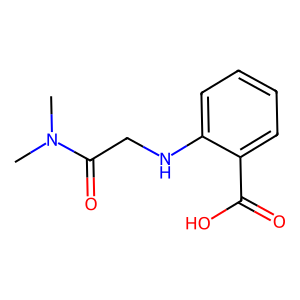

In [35]:
# molecule 3208 is among the most similar
similarity = DataStructs.TanimotoSimilarity(aspirin_fp, all_fps[3208])
print(similarity)
Draw.MolToImage(all_mols[3208])

0.023255813953488372


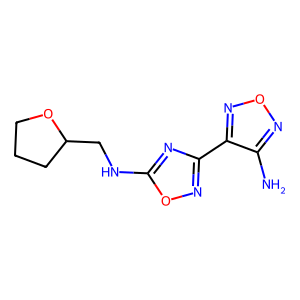

In [31]:
# molecule 1219 is among the most dissimilar
similarity = DataStructs.TanimotoSimilarity(aspirin_fp, all_fps[1219])
print(similarity)
Draw.MolToImage(all_mols[1219])